# CUSTOMERS REQUIREMENT || PROJECT GOAL || PROBLEM STATEMENT

We have identify the churn rate with respect to customers how many customers using this service or how many customers 
using another operator and why there are going to that side and what will give too the recommendation to customers again they will take this service only

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
data = pd.read_csv(r'C:\Users\Tejasva\Downloads\telecom_churn_dataset.csv', header=None)

In [3]:
data.columns=['State','Account Length','Area code','Phone','International plan','VMail plan','VMail message','Day mins',
              'Day calls','Day charge','Eve mins','Eve calls','Eve charge','Night mins','Night calls','Night charge',
             'International mins','International calls','International charge','CustServ charge','Churn']

In [4]:
data

,State,Account Length,Area code,Phone,International plan,VMail plan,VMail message,Day mins,Day calls,Day charge,...,Eve calls,Eve charge,Night mins,Night calls,Night charge,International mins,International calls,International charge,CustServ charge,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,NY,57,510,345-7512,no,yes,25,144.0,81,24.48,...,112,15.91,158.6,122,7.14,8.5,6,2.30,3,0
4613,NM,177,408,343-6820,no,yes,29,189.0,91,32.13,...,96,25.76,163.6,116,7.36,15.7,1,4.24,3,0
4614,VT,67,408,338-4794,no,yes,33,127.5,126,21.68,...,129,25.17,200.9,91,9.04,13.0,3,3.51,1,0
4615,MI,98,415,355-8388,no,yes,23,168.9,98,28.71,...,117,19.24,165.5,96,7.45,14.3,3,3.86,0,0


# Breakdown of our features 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   State                 4617 non-null   object 
 1   Account Length        4617 non-null   int64  
 2   Area code             4617 non-null   int64  
 3   Phone                 4617 non-null   object 
 4   International plan    4617 non-null   object 
 5   VMail plan            4617 non-null   object 
 6   VMail message         4617 non-null   int64  
 7   Day mins              4617 non-null   float64
 8   Day calls             4617 non-null   int64  
 9   Day charge            4617 non-null   float64
 10  Eve mins              4617 non-null   float64
 11  Eve calls             4617 non-null   int64  
 12  Eve charge            4617 non-null   float64
 13  Night mins            4617 non-null   float64
 14  Night calls           4617 non-null   int64  
 15  Night charge         

In [6]:
data.nunique()

State                     51
Account Length           218
Area code                  3
Phone                   4617
International plan         2
VMail plan                 2
VMail message             47
Day mins                1901
Day calls                123
Day charge              1901
Eve mins                1833
Eve calls                125
Eve charge              1621
Night mins              1813
Night calls              130
Night charge            1012
International mins       168
International calls       21
International charge     168
CustServ charge           10
Churn                      2
dtype: int64

In [7]:
#looking for the description of the dataset to get insights of the data
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
State,4617,51,WV,149,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Account Length,4617.0,NaN,NaN,NaN,100.645224,39.597194,1.0,74.0,100.0,127.0,243.0
Area code,4617.0,NaN,NaN,NaN,437.04635,42.288212,408.0,408.0,415.0,510.0,510.0
Phone,4617,4617,382-4657,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
International plan,4617,2,no,4171,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VMail plan,4617,2,no,3381,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VMail message,4617.0,NaN,NaN,NaN,7.849903,13.592333,0.0,0.0,0.0,17.0,51.0
Day mins,4617.0,NaN,NaN,NaN,180.447152,53.98354,0.0,143.7,180.0,216.8,351.5
Day calls,4617.0,NaN,NaN,NaN,100.054364,19.883027,0.0,87.0,100.0,113.0,165.0
Day charge,4617.0,NaN,NaN,NaN,30.676576,9.177145,0.0,24.43,30.6,36.86,59.76


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Account Length,4617.0,100.645224,39.597194,1.00,74.00,100.00,127.00,243.00
Area code,4617.0,437.046350,42.288212,408.00,408.00,415.00,510.00,510.00
VMail message,4617.0,7.849903,13.592333,0.00,0.00,0.00,17.00,51.00
Day mins,4617.0,180.447152,53.983540,0.00,143.70,180.00,216.80,351.50
Day calls,4617.0,100.054364,19.883027,0.00,87.00,100.00,113.00,165.00
Day charge,4617.0,30.676576,9.177145,0.00,24.43,30.60,36.86,59.76
Eve mins,4617.0,200.429088,50.557001,0.00,165.90,200.80,234.00,363.70
Eve calls,4617.0,100.179770,19.821314,0.00,87.00,101.00,114.00,170.00
Eve charge,4617.0,17.036703,4.297332,0.00,14.10,17.07,19.89,30.91
Night mins,4617.0,200.623933,50.543616,23.20,167.10,200.80,234.90,395.00


In [9]:
#printing the count of true and false in 'churn' feature
print(data.Churn.value_counts())

0    3961
1     656
Name: Churn, dtype: int64


In [10]:
#checking missing values and duplicate values
data.isnull().sum()

State                   0
Account Length          0
Area code               0
Phone                   0
International plan      0
VMail plan              0
VMail message           0
Day mins                0
Day calls               0
Day charge              0
Eve mins                0
Eve calls               0
Eve charge              0
Night mins              0
Night calls             0
Night charge            0
International mins      0
International calls     0
International charge    0
CustServ charge         0
Churn                   0
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


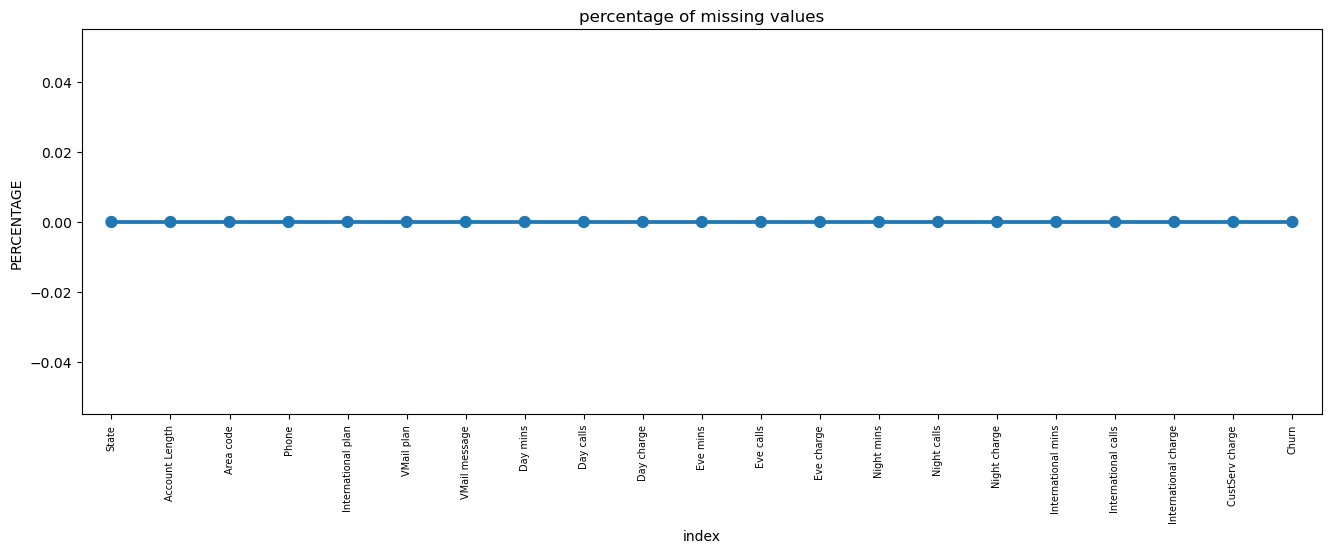

In [11]:
missing = pd.DataFrame((data.isnull().sum())*100/data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title('percentage of missing values')
plt.ylabel('PERCENTAGE')
plt.show()

In [12]:
#checking duplicate values
len(data[data.duplicated()])

0

In [13]:
#data['Churn']=data['Churn'].map(lambda x : x.rstrip('.'))
#data.iloc[:,0:21]

# Exploratory Data Analysis of the Dataset 

Analysing what the dependent variable said to us i.e 'CHURN'

In [14]:
#printing the unique value inside the column 
data['Churn'].unique()

array([0, 1], dtype=int64)

In [15]:
print(data.Churn.value_counts())

0    3961
1     656
Name: Churn, dtype: int64


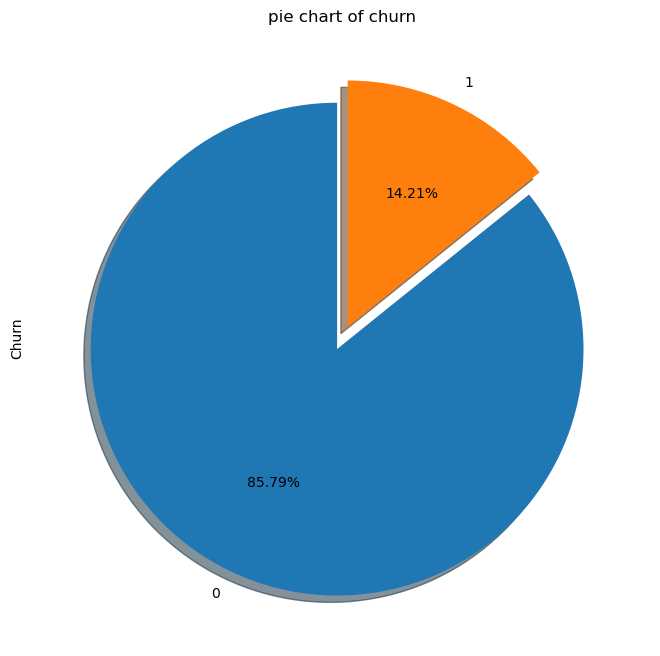

In [16]:
#To get the pie chart to analyze churn 
data['Churn'].value_counts().plot.pie(explode=[0.05,0.05],autopct='%1.2f%%', startangle=90, shadow=True, figsize=(8,8))
plt.title("pie chart of churn")
plt.show()

In [17]:
data['Churn'].value_counts()

0    3961
1     656
Name: Churn, dtype: int64

AttributeError: module 'matplotlib.pyplot' has no attribute 'circle'

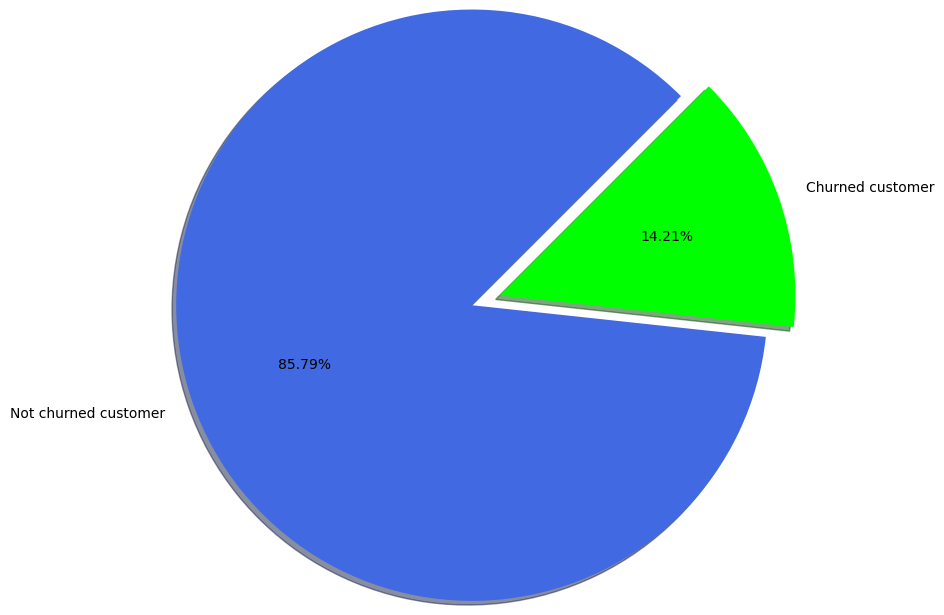

In [19]:
#To get the donut plot to analyze churn 
x = data['Churn'].value_counts().values
plt.pie(x, explode = [0,0.2], autopct='%1.2f%%', shadow=True, radius = 2.0, labels=['Not churned customer','Churned customer'], colors=['royalblue','lime'],counterclock=True,startangle=45)
circle = plt.circle((0,0),1, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('Donut Plot for Churn')
plt.show()

<AxesSubplot:xlabel='Churn', ylabel='count'>

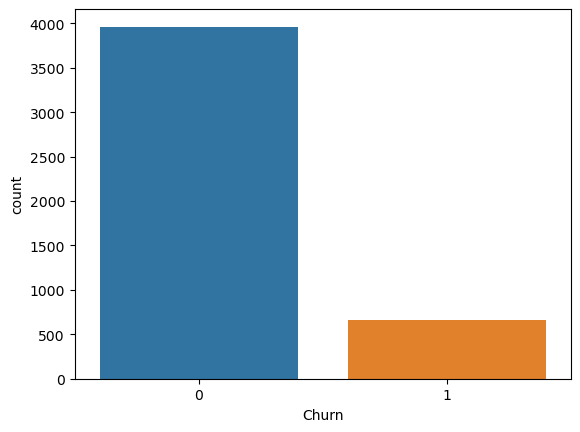

In [20]:
#let's see churn by using countplot
sns.countplot(x=data.Churn)

After analyzing the churn column, wehad little to say like almost 15% od customers have churned. let's see what other 
features say to us and what relation we get after correlated with churn 

# Analyzing the state column 

In [21]:
data['State'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [22]:
data['State'].nunique()

51

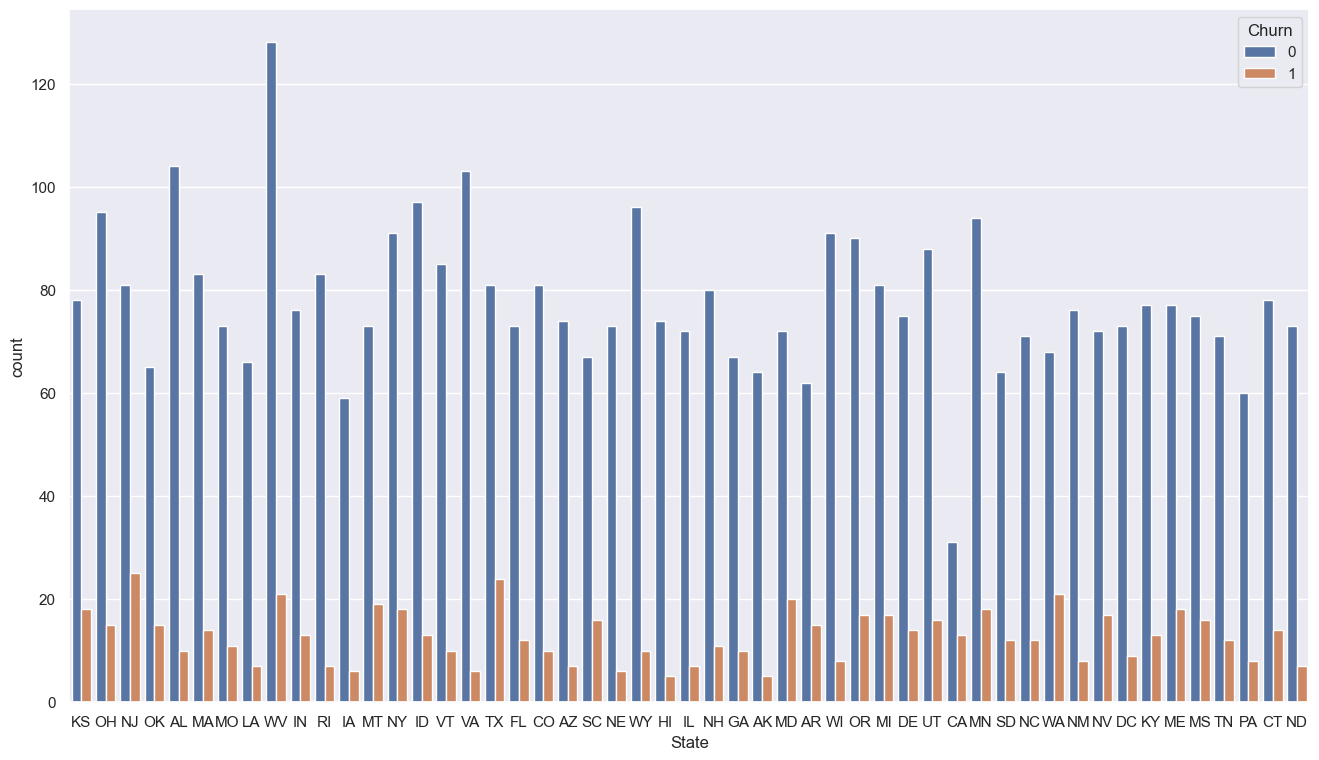

In [23]:
#camparison churn with respect to state by using countplot 
sns.set(style='darkgrid')
plt.figure(figsize=(16,9))
ax = sns.countplot(x='State', hue='Churn', data=data)
plt.show()

In [24]:
#data['Churn']=data['Churn'].map(lambda x : x.rstrip('.'))

In [25]:
#data["Churn"].replace(("True","1"),inplace=True)
#data["Churn"].replace({"True":"Yes","False":"No"},inplace=True)

In [26]:
#data["Churn"].replace({"TRUE":1,"FALSE":0},inplace=True)

In [27]:
data

,State,Account Length,Area code,Phone,International plan,VMail plan,VMail message,Day mins,Day calls,Day charge,...,Eve calls,Eve charge,Night mins,Night calls,Night charge,International mins,International calls,International charge,CustServ charge,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,NY,57,510,345-7512,no,yes,25,144.0,81,24.48,...,112,15.91,158.6,122,7.14,8.5,6,2.30,3,0
4613,NM,177,408,343-6820,no,yes,29,189.0,91,32.13,...,96,25.76,163.6,116,7.36,15.7,1,4.24,3,0
4614,VT,67,408,338-4794,no,yes,33,127.5,126,21.68,...,129,25.17,200.9,91,9.04,13.0,3,3.51,1,0
4615,MI,98,415,355-8388,no,yes,23,168.9,98,28.71,...,117,19.24,165.5,96,7.45,14.3,3,3.86,0,0


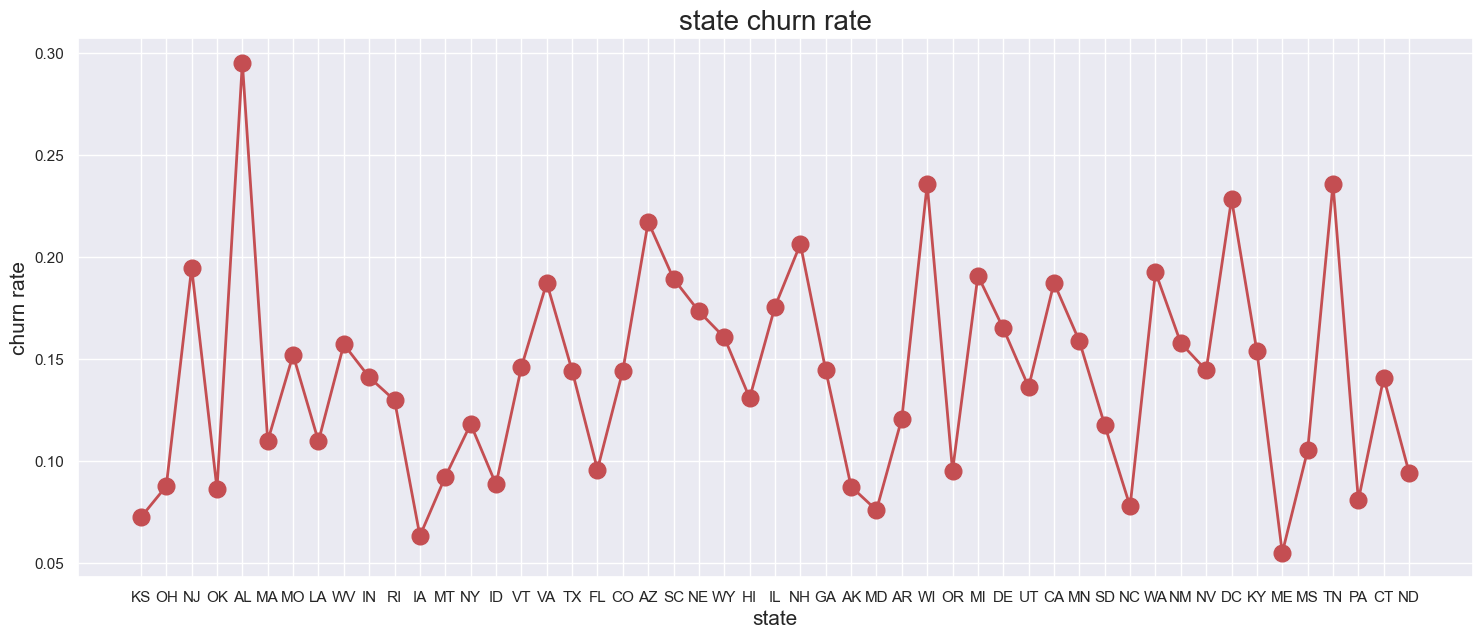

In [28]:
s1= data['State'].unique()
s2= data.groupby(['State'])['Churn'].mean()

plt.rcParams['figure.figsize'] = (18,7)

plt.plot(s1,s2,color='r', marker='o', linewidth=2, markersize=12)

plt.title('state churn rate', fontsize = 20)
plt.xlabel('state', fontsize=15)
plt.ylabel('churn rate', fontsize= 15)
plt.show()

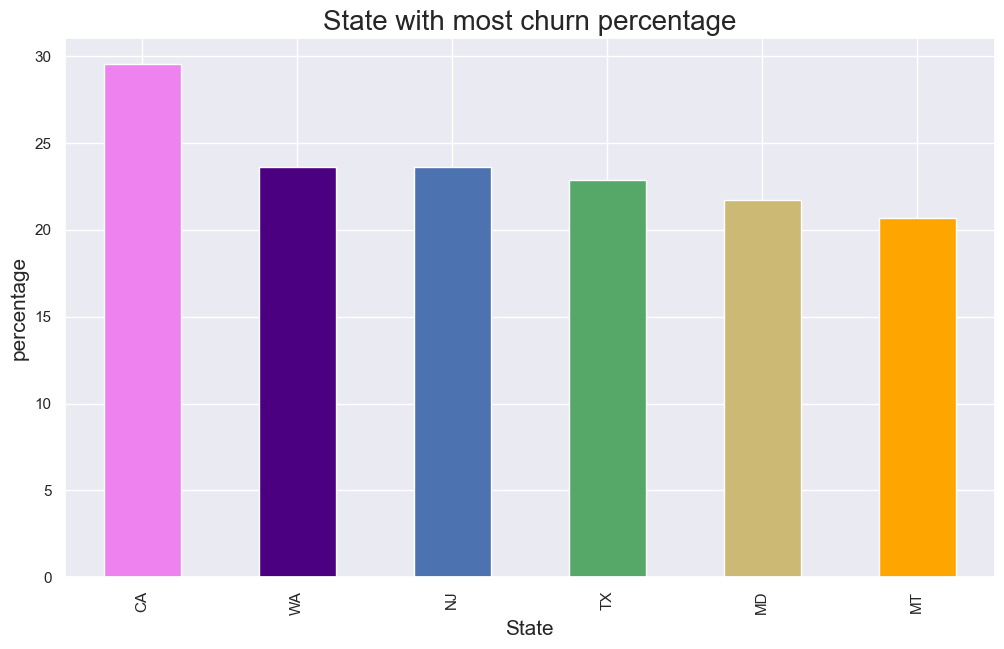

In [29]:
plt.rcParams['figure.figsize']= (12,7)
color = plt.cm.copper(np.linspace(0,0.5,20))
((data.groupby(['State'])['Churn'].mean())*100).sort_values(ascending = False).head(6).plot.bar(color = ['violet','indigo','b','g','y','orange','r'])
plt.title('State with most churn percentage', fontsize=20)
plt.xlabel('State', fontsize=15)
plt.ylabel('percentage', fontsize=15)
plt.show()

In [30]:
#calculate state vs churn percentage 
state_data = pd.crosstab(data['State'],data['Churn'])
state_data['percentage_churn'] = state_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(state_data)

Churn    0   1  percentage_churn
State                           
AK      64   5          7.246377
AL     104  10          8.771930
AR      62  15         19.480519
AZ      74   7          8.641975
CA      31  13         29.545455
CO      81  10         10.989011
CT      78  14         15.217391
DC      73   9         10.975610
DE      75  14         15.730337
FL      73  12         14.117647
GA      67  10         12.987013
HI      74   5          6.329114
IA      59   6          9.230769
ID      97  13         11.818182
IL      72   7          8.860759
IN      76  13         14.606742
KS      78  18         18.750000
KY      77  13         14.444444
LA      66   7          9.589041
MA      83  14         14.432990
MD      72  20         21.739130
ME      77  18         18.947368
MI      81  17         17.346939
MN      94  18         16.071429
MO      73  11         13.095238
MS      75  16         17.582418
MT      73  19         20.652174
NC      71  12         14.457831
ND      73

In [31]:
#show the most churn state of top 10 by ascending the above list 
data.groupby(['State'])['Churn'].mean().sort_values(ascending=False).head(10)

State
CA    0.295455
WA    0.235955
NJ    0.235849
TX    0.228571
MD    0.217391
MT    0.206522
AR    0.194805
SC    0.192771
NV    0.191011
ME    0.189474
Name: Churn, dtype: float64

# Analyzing area code column of feature

In [32]:
#calculate area code vs churn percentage 
area_code_data = pd.crosstab(data['Area code'],data['Churn'])
area_code_data['percentage_churn']= area_code_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis=1)
print(area_code_data)

Churn         0    1  percentage_churn
Area code                             
408         996  165         14.211886
415        1981  318         13.832101
510         984  173         14.952463


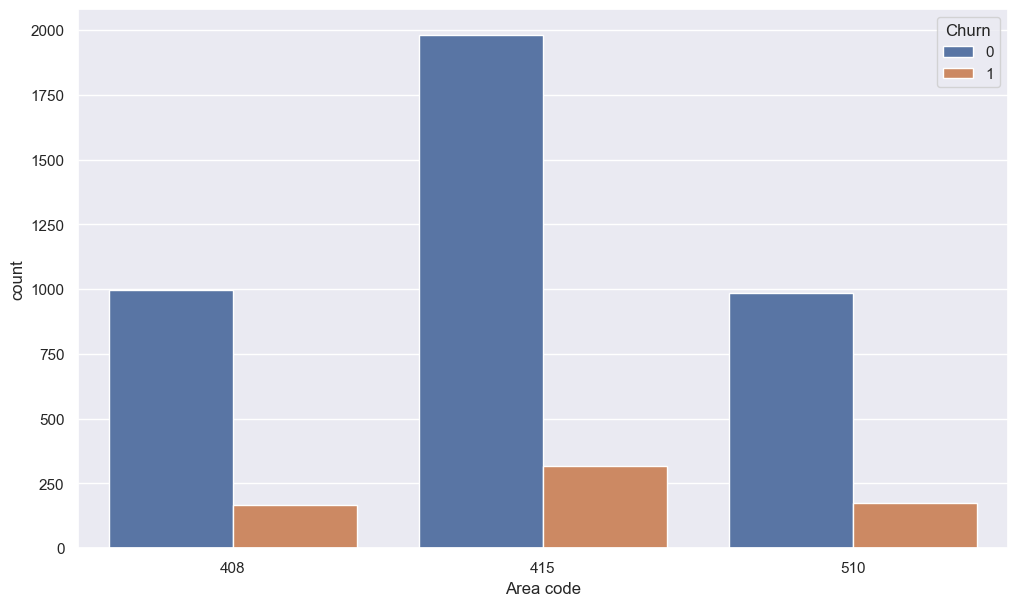

In [33]:
sns.set(style='darkgrid')
ax = sns.countplot(x='Area code', hue='Churn', data=data)
plt.show()

In the above data, we notice that there is only 3 unique are there, and the churn rate of these area codes are almost same.
we don't think there is any kind of relation present between the 'area code' and 'churn' due to which the customer leaves the operator.

# Analyzing account length column or FEATURE

In [34]:
#separating churn and not churned customers 
churn_df = data[data['Churn'] == bool(True)]
not_churn_df = data[data['Churn'] == bool(False)]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Account Length', ylabel='Density'>

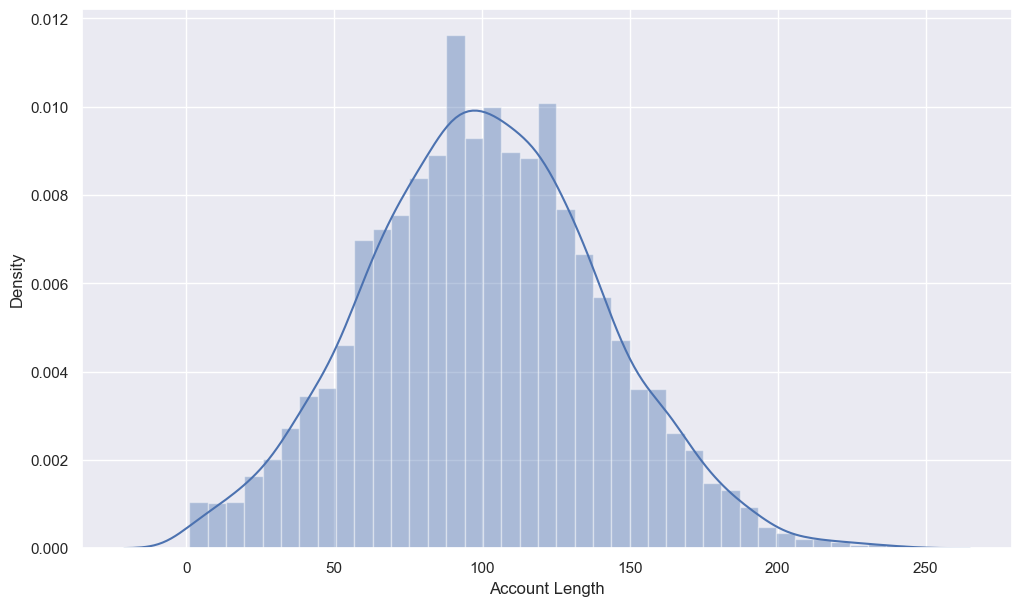

In [35]:
sns.distplot(data['Account Length'])

# Analyzing International Plan 

In [36]:
data['International plan'].value_counts()

 no     4171
 yes     446
Name: International plan, dtype: int64

In [37]:
data['International plan'].unique()

array([' no', ' yes'], dtype=object)

In [38]:
#calculate the international plan vs churn rate percentage 
International_plan_data = pd.crosstab(data['International plan'],data['Churn'])
International_plan_data['percentage_churn']= International_plan_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis=1)
print(International_plan_data)

Churn                  0    1  percentage_churn
International plan                             
 no                 3701  470         11.268281
 yes                 260  186         41.704036


<AxesSubplot:xlabel='International plan', ylabel='count'>

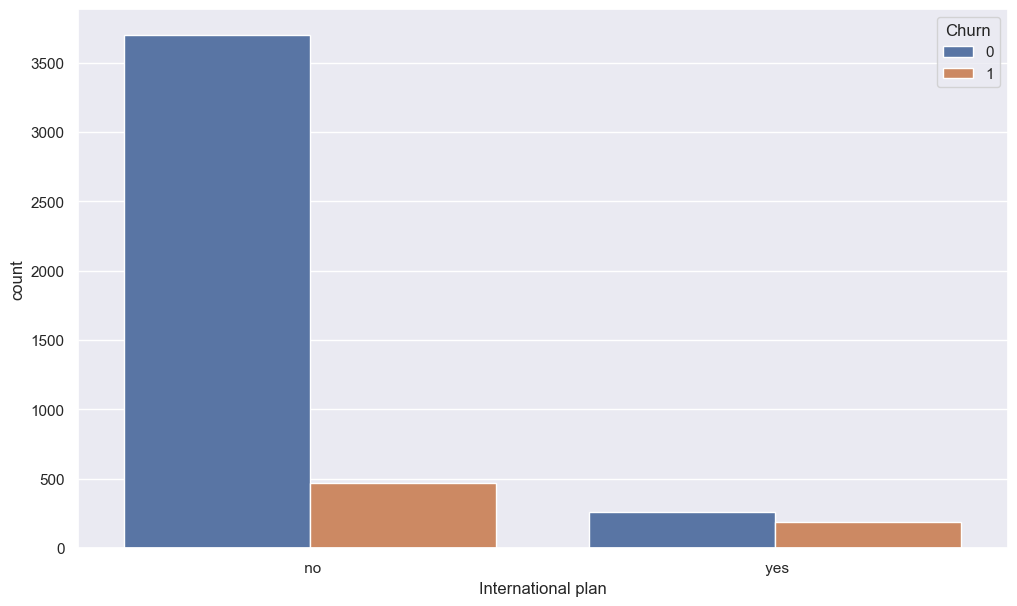

In [39]:
sns.countplot(x='International plan', hue='Churn', data=data)

# Analyzing Customer Service calls with respect to churn rate

In [40]:
data['CustServ charge'].value_counts()

1    1651
2    1031
0     951
3     616
4     234
5      89
6      28
7      13
9       2
8       2
Name: CustServ charge, dtype: int64

In [41]:
CustServ_data = pd.crosstab(data['CustServ charge'],data['Churn'])
CustServ_data['percentage_churn']= CustServ_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis=1)
print(CustServ_data)

Churn               0    1  percentage_churn
CustServ charge                             
0                 835  116         12.197687
1                1475  176         10.660206
2                 919  112         10.863240
3                 551   65         10.551948
4                 130  104         44.444444
5                  34   55         61.797753
6                  10   18         64.285714
7                   6    7         53.846154
8                   1    1         50.000000
9                   0    2        100.000000


<AxesSubplot:xlabel='CustServ charge', ylabel='count'>

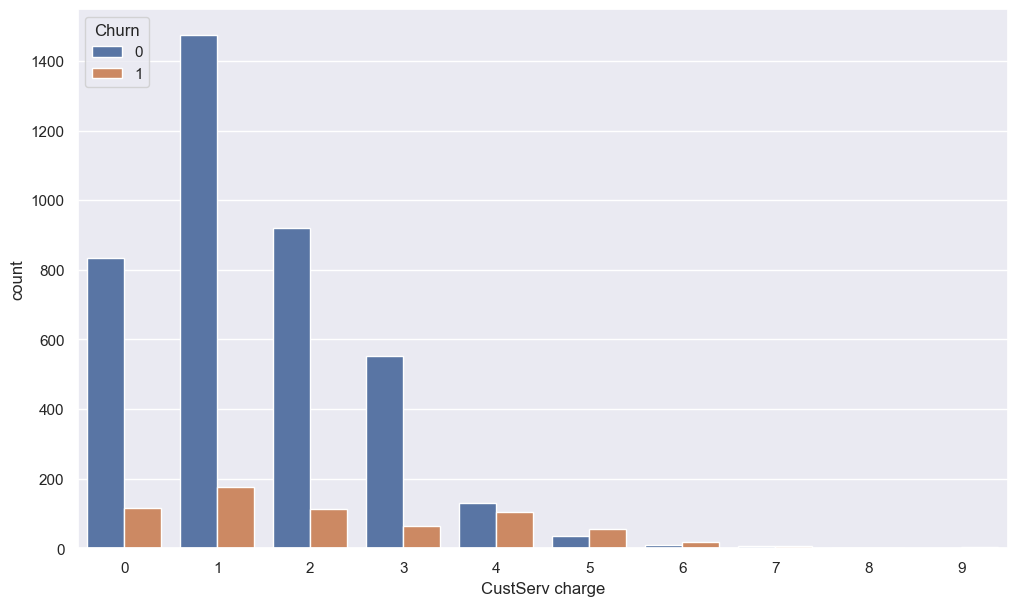

In [42]:
sns.countplot(x='CustServ charge', hue='Churn', data=data)

In [43]:
#sns.pairplot(data, height=3)

# CONCLUSION AND SUMMARY

# RECOMMENDATIONS

# ML Modeling

In [44]:
y = data.Churn

In [45]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4612    0
4613    0
4614    0
4615    0
4616    0
Name: Churn, Length: 4617, dtype: int64

In [46]:
X = data.iloc[:,6:-1]

In [47]:
X

,VMail message,Day mins,Day calls,Day charge,Eve mins,Eve calls,Eve charge,Night mins,Night calls,Night charge,International mins,International calls,International charge,CustServ charge
0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,25,144.0,81,24.48,187.2,112,15.91,158.6,122,7.14,8.5,6,2.30,3
4613,29,189.0,91,32.13,303.1,96,25.76,163.6,116,7.36,15.7,1,4.24,3
4614,33,127.5,126,21.68,296.1,129,25.17,200.9,91,9.04,13.0,3,3.51,1
4615,23,168.9,98,28.71,226.3,117,19.24,165.5,96,7.45,14.3,3,3.86,0


In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Clasification Model

# Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
model_logr = LogisticRegression()

In [52]:
model_logr.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [124]:
predict_logr = model_logr.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [125]:
accuracy_score(predict_logr,y_test)*100

86.36363636363636

In [88]:
confusion_matrix(predict_logr,y_test)

array([[794, 121],
       [  5,   4]], dtype=int64)

In [130]:
# performance analysis On test data
from sklearn import metrics
ypred = model_logr.predict(X_test)
print("Accuracy : ",metrics.accuracy_score(y_test,ypred2))
print("Recall : ",metrics.recall_score(y_test,ypred2))
print("F1 score : ",metrics.f1_score(y_test,ypred2))
print("Precision : ",metrics.precision_score(y_test,ypred2))

Accuracy :  0.8636363636363636
Recall :  0.032
F1 score :  0.059701492537313425
Precision :  0.4444444444444444


In [131]:
# performance analysis on train data
from sklearn import metrics
ypred2 = model_logr.predict(X_train)
print("Accuracy : ",metrics.accuracy_score(y_train,ypred2))
print("Recall : ",metrics.recall_score(y_train,ypred2))
print("F1 score : ",metrics.f1_score(y_train,ypred2))
print("Precision : ",metrics.precision_score(y_train,ypred2))

Accuracy :  0.8545897644191714
Recall :  0.0583804143126177
F1 score :  0.10350584307178631
Precision :  0.45588235294117646


In [110]:
# KNN Classifier

from sklearn.neighbors import KNeighborsClassifier

model_knc = KNeighborsClassifier()

model_knc.fit(X_train,y_train)

predict_knc = model_knc.predict(X_test)

accuracy_score(predict_knc,y_test)*100

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


88.41991341991343

In [109]:
confusion_matrix(predict_knc,y_test)

array([[783,  91],
       [ 16,  34]], dtype=int64)

In [97]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

model_dtc = DecisionTreeClassifier()

model_dtc.fit(X_train,y_train)

predict_dtc = model_dtc.predict(X_test)

accuracy_score(predict_dtc,y_test)*100

85.06493506493507

In [98]:
confusion_matrix(predict_dtc,y_test)

array([[714,  53],
       [ 85,  72]], dtype=int64)

In [116]:
# Random Forest Reggresorm

from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier()

model_rfc.fit(X_train,y_train)

predict_rfc = model_rfc.predict(X_test)

accuracy_score(predict_rfc,y_test)

0.9285714285714286

In [117]:
confusion_matrix(predict_rfc,y_test)

array([[793,  60],
       [  6,  65]], dtype=int64)

In [118]:
# Support Vector Machine

from sklearn.svm import SVC

model_svc = SVC()

model_svc.fit(X_train,y_train)

predict_svc = model_svc.predict(X_test)

accuracy_score(predict_svc,y_test)*100

87.12121212121212

In [119]:
confusion_matrix(predict_svc,y_test)

array([[798, 118],
       [  1,   7]], dtype=int64)